# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
from sklearn import datasets
digit_num = 10
digits = datasets.load_digits(n_class=digit_num)
X = digits.data
y = digits.target

In [2]:
print('Original data size X:{}, y:{}'.format(X.shape, y.shape))

Original data size X:(1797, 64), y:(1797,)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from scipy.stats import sem
import warnings
warnings.filterwarnings('ignore')
import time
from IPython.display import display

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rf_clf = RandomForestClassifier()
gdbc_clf = GradientBoostingClassifier()
rf_result = cross_val_score(rf_clf, x_train, y_train, cv=5)
gdbc_result = cross_val_score(gdbc_clf, x_train, y_train, cv=5)
print('RF_CV_result: {:.3}+/-{:.3} with 0.95 CI\n{}\n'.format(np.mean(rf_result), sem(rf_result)*2, rf_result))
print('GDBC_CV_result: {:.3}+/-{:.3} with 0.95 CI\n{}\n'.format(np.mean(gdbc_result), sem(gdbc_result)*2, gdbc_result))

#check test result and time consuming
time_1 = time.time()
rf_clf.fit(x_train, y_train)
rf_y_pred = rf_clf.predict(x_test)
time_2 = time.time()
gdbc_clf.fit(x_train, y_train)
gdbc_ypred = gdbc_clf.predict(x_test)
time_3 = time.time()
print('RF_test_acc:{:.3}'.format(metrics.accuracy_score(y_test, rf_y_pred)))
print('RF_time_duration:{:.3} sec'.format(time_2 - time_1))
rf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, rf_y_pred), columns=digits.target_names[:digit_num], index=digits.target_names[:digit_num])
print('RF_cofusion_matrix:')
display(rf_matrix)
print('\nGDBC_test_acc:{:.3}'.format(metrics.accuracy_score(y_test, gdbc_ypred)))
print('GDBC_time_duration:{:.3} sec'.format(time_3 - time_2))
gdbc_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, gdbc_ypred), columns=digits.target_names[:digit_num], index=digits.target_names[:digit_num])
print('GDBC_cofusion_matrix:')
display(gdbc_matrix)

RF_CV_result: 0.937+/-0.0146 with 0.95 CI
[0.93835616 0.95833333 0.91958042 0.92307692 0.94736842]

GDBC_CV_result: 0.958+/-0.00751 with 0.95 CI
[0.95547945 0.96180556 0.96153846 0.96503497 0.94385965]

RF_test_acc:0.95
RF_time_duration:0.036 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,1,0,0,0,0,0,0,0,0
1,0,27,0,0,0,0,0,0,0,0
2,0,4,42,0,0,0,0,0,1,0
3,0,0,0,32,0,0,0,0,0,0
4,0,0,0,0,28,0,1,1,0,0
5,0,0,0,0,0,38,0,0,0,0
6,1,0,0,0,0,0,34,0,0,0
7,0,0,0,0,0,0,0,31,1,0
8,0,3,1,0,0,1,0,0,34,0
9,0,0,0,1,1,1,0,0,0,40



GDBC_test_acc:0.969
GDBC_time_duration:4.07 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,0,0,0,0,1,0
1,0,25,1,0,1,0,0,0,0,0
2,0,1,45,0,0,0,0,1,0,0
3,0,0,0,30,0,0,0,0,1,1
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,0,1,37,0,0,0,0
6,0,0,0,0,0,1,34,0,0,0
7,0,0,0,0,0,0,0,31,1,0
8,0,1,0,0,0,0,0,0,38,0
9,0,0,0,0,0,0,0,0,0,43


In [ ]:
#Hyper Parameter tuning by GridSearch
param_grid = {'n_estimators':list(range(100, 1001, 300)),
              'max_depth':list(range(2, 5)),
             }
GridSearchCV(RandomForestClassifier())

載入 相關套件 並 執行 PCA 實驗 ...

In [6]:
from sklearn.decomposition import PCA
columns = ['PCA_dim', 'RF_CV_acc', 'RF_test_acc', 'RF_processing_time',
           'GDB_CV_acc', 'GDB_test_acc', 'GDB_processing_time'
          ]
Summary_table = pd.DataFrame(columns=columns)
for idx, n in enumerate(list(range(1, 11)) + list(range(20, 61, 10))) :
    print('-'*70)
    print('PCA_n_feature_n: ', n)
    Summary_table.loc[idx, 'PCA_dim'] = n
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    print('PCA_train_data_size:', x_train_pca.shape)
    print('PCA_test_data_size:', x_test_pca.shape)
    
    rf_clf = RandomForestClassifier()
    gdbc_clf = GradientBoostingClassifier()
    rf_result = cross_val_score(rf_clf, x_train_pca, y_train, cv=5)
    gdbc_result = cross_val_score(gdbc_clf, x_train_pca, y_train, cv=5)
    print('\nPCA_RF_CV_result: {:.3}+/-{:.3} with 0.95 CI\n{}\n'.format(np.mean(rf_result), sem(rf_result)*2, rf_result))
    print('PCA_GDBC_CV_result: {:.3}+/-{:.3} with 0.95 CI\n{}\n'.format(np.mean(gdbc_result), sem(gdbc_result)*2, gdbc_result))
    Summary_table.loc[idx, 'RF_CV_acc'] = np.mean(rf_result)
    Summary_table.loc[idx, 'GDB_CV_acc'] = np.mean(gdbc_result)
    
    #check test result and time consuming
    time_1 = time.time()
    rf_clf.fit(x_train_pca, y_train)
    rf_y_pred = rf_clf.predict(x_test_pca)
    time_2 = time.time()
    gdbc_clf.fit(x_train_pca, y_train)
    gdbc_ypred = gdbc_clf.predict(x_test_pca)
    time_3 = time.time()
    print('RF_test_acc:{:.3}'.format(metrics.accuracy_score(y_test, rf_y_pred)))
    print('RF_time_duration:{:.3} sec'.format(time_2 - time_1))
    Summary_table.loc[idx, 'RF_test_acc'] = metrics.accuracy_score(y_test, rf_y_pred)
    Summary_table.loc[idx, 'RF_processing_time'] = time_2 - time_1
    Summary_table.loc[idx, 'GDB_test_acc'] = metrics.accuracy_score(y_test, gdbc_ypred)
    Summary_table.loc[idx, 'GDB_processing_time'] = time_3 - time_2
    
    rf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, rf_y_pred), columns=digits.target_names[:digit_num], index=digits.target_names[:digit_num])
    print('RF_cofusion_matrix:')
    display(rf_matrix)
    print('\nGDBC_test_acc:{:.3}'.format(metrics.accuracy_score(y_test, gdbc_ypred)))
    print('GDBC_time_duration:{:.3} sec'.format(time_3 - time_2))
    gdbc_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, gdbc_ypred), columns=digits.target_names[:digit_num], index=digits.target_names[:digit_num])
    print('GDBC_cofusion_matrix:')
    display(gdbc_matrix)

----------------------------------------------------------------------
PCA_n_feature_n:  1
PCA_train_data_size: (1437, 1)
PCA_test_data_size: (360, 1)

PCA_RF_CV_result: 0.317+/-0.0244 with 0.95 CI
[0.31849315 0.27083333 0.32517483 0.33216783 0.34035088]

PCA_GDBC_CV_result: 0.332+/-0.0159 with 0.95 CI
[0.32876712 0.30555556 0.32867133 0.34965035 0.34736842]

RF_test_acc:0.328
RF_time_duration:0.028 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,10,7,1,0,1,4,0,5,8,1
1,5,9,0,0,0,4,2,4,2,1
2,2,5,11,4,0,5,0,5,5,10
3,0,0,3,23,0,3,0,0,0,3
4,0,2,0,0,16,1,11,0,0,0
5,2,6,7,1,0,7,0,5,7,3
6,4,2,0,0,5,1,22,0,1,0
7,8,7,3,1,0,4,0,3,2,4
8,5,3,7,2,0,5,1,9,5,2
9,3,1,7,13,0,4,1,1,1,12



GDBC_test_acc:0.367
GDBC_time_duration:1.16 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,9,5,3,0,1,4,0,8,6,1
1,1,11,1,0,0,3,3,6,1,1
2,3,3,14,3,0,3,0,6,5,10
3,0,0,4,23,0,1,0,0,0,4
4,0,0,0,0,17,1,12,0,0,0
5,3,6,6,2,0,4,0,9,6,2
6,0,2,0,0,3,0,30,0,0,0
7,7,4,4,1,0,2,0,5,5,4
8,7,4,6,2,0,4,1,6,7,2
9,4,1,6,15,0,2,1,1,1,12


----------------------------------------------------------------------
PCA_n_feature_n:  2
PCA_train_data_size: (1437, 2)
PCA_test_data_size: (360, 2)

PCA_RF_CV_result: 0.603+/-0.0188 with 0.95 CI
[0.5890411  0.60763889 0.58041958 0.6013986  0.63508772]

PCA_GDBC_CV_result: 0.603+/-0.0185 with 0.95 CI
[0.58561644 0.59722222 0.5979021  0.59440559 0.63859649]

RF_test_acc:0.611
RF_time_duration:0.026 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,34,0,1,0,0,1,1,0,0,0
1,0,14,1,0,2,8,0,1,1,0
2,0,3,25,2,0,7,0,1,6,3
3,0,0,2,20,0,4,0,0,0,6
4,0,3,0,0,24,0,2,1,0,0
5,1,5,1,0,0,16,0,5,7,3
6,3,0,0,0,0,0,32,0,0,0
7,0,4,0,3,0,2,0,22,1,0
8,0,5,4,1,1,11,0,3,12,2
9,0,4,3,9,0,4,0,0,2,21



GDBC_test_acc:0.653
GDBC_time_duration:1.26 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,34,0,0,0,0,2,1,0,0,0
1,0,15,3,0,2,6,0,1,0,0
2,0,2,28,2,0,4,0,0,9,2
3,0,0,1,22,0,4,0,0,1,4
4,0,2,0,0,25,0,3,0,0,0
5,0,3,1,0,0,13,0,6,11,4
6,1,0,0,0,0,2,32,0,0,0
7,0,2,0,2,0,0,0,26,2,0
8,0,2,4,1,0,12,0,2,16,2
9,0,1,2,8,0,3,1,1,3,24


----------------------------------------------------------------------
PCA_n_feature_n:  3
PCA_train_data_size: (1437, 3)
PCA_test_data_size: (360, 3)

PCA_RF_CV_result: 0.723+/-0.0199 with 0.95 CI
[0.69178082 0.75347222 0.72027972 0.73076923 0.71929825]

PCA_GDBC_CV_result: 0.736+/-0.017 with 0.95 CI
[0.73972603 0.70833333 0.75524476 0.72727273 0.75087719]

RF_test_acc:0.733
RF_time_duration:0.024 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,23,0,0,0,0,1,2,1,0
2,0,3,30,4,0,2,0,1,7,0
3,0,0,1,25,0,4,0,0,0,2
4,1,0,0,0,28,0,0,1,0,0
5,0,1,0,0,0,19,0,4,10,4
6,2,1,0,0,0,0,32,0,0,0
7,0,4,2,2,0,0,0,24,0,0
8,0,3,2,1,0,16,0,0,17,0
9,0,2,0,5,0,3,0,3,0,30



GDBC_test_acc:0.778
GDBC_time_duration:1.41 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,35,0,0,0,1,1,0,0,0,0
1,0,22,1,0,0,0,1,2,1,0
2,0,4,35,2,0,1,0,0,5,0
3,0,0,1,26,0,3,0,0,0,2
4,1,0,0,0,28,0,0,0,1,0
5,0,1,1,0,0,20,0,5,9,2
6,1,0,0,0,1,1,32,0,0,0
7,0,4,0,1,0,0,0,27,0,0
8,0,2,1,2,0,12,0,0,22,0
9,0,1,0,5,0,1,0,3,0,33


----------------------------------------------------------------------
PCA_n_feature_n:  4
PCA_train_data_size: (1437, 4)
PCA_test_data_size: (360, 4)

PCA_RF_CV_result: 0.828+/-0.0133 with 0.95 CI
[0.82876712 0.8125     0.83916084 0.84615385 0.81403509]

PCA_GDBC_CV_result: 0.83+/-0.0154 with 0.95 CI
[0.82534247 0.80555556 0.85314685 0.83566434 0.83157895]

RF_test_acc:0.828
RF_time_duration:0.031 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,35,0,0,0,1,1,0,0,0,0
1,0,26,0,0,0,0,0,1,0,0
2,0,3,35,0,0,1,0,0,8,0
3,0,0,0,29,0,0,0,0,0,3
4,1,0,0,0,28,0,0,1,0,0
5,2,0,0,0,0,29,0,3,2,2
6,1,1,0,0,0,1,32,0,0,0
7,0,1,0,1,0,1,0,26,2,1
8,0,1,0,1,0,6,0,3,27,1
9,0,0,0,5,0,3,0,2,2,31



GDBC_test_acc:0.853
GDBC_time_duration:1.53 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,35,0,0,0,1,1,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,3,36,1,0,0,0,0,6,1
3,0,0,0,28,0,0,0,0,0,4
4,1,0,0,0,28,0,0,0,1,0
5,0,0,0,0,0,31,0,2,4,1
6,1,1,0,0,1,1,31,0,0,0
7,0,0,1,0,0,0,0,30,0,1
8,0,1,2,1,0,2,0,1,32,0
9,0,0,0,6,0,2,0,2,2,31


----------------------------------------------------------------------
PCA_n_feature_n:  5
PCA_train_data_size: (1437, 5)
PCA_test_data_size: (360, 5)

PCA_RF_CV_result: 0.887+/-0.012 with 0.95 CI
[0.89041096 0.89583333 0.88811189 0.8951049  0.86315789]

PCA_GDBC_CV_result: 0.889+/-0.00869 with 0.95 CI
[0.89041096 0.875      0.89160839 0.9020979  0.8877193 ]

RF_test_acc:0.883
RF_time_duration:0.033 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,34,0,1,0,1,1,0,0,0,0
1,0,25,0,0,1,0,0,1,0,0
2,0,3,40,0,0,0,0,0,4,0
3,0,0,0,26,0,0,0,0,1,5
4,1,0,0,0,28,0,0,1,0,0
5,0,0,0,0,0,36,0,1,1,0
6,1,0,0,0,0,0,33,0,0,1
7,0,0,0,1,0,0,0,30,1,0
8,0,4,2,1,0,0,0,1,31,0
9,0,1,0,4,0,0,0,1,2,35



GDBC_test_acc:0.906
GDBC_time_duration:1.62 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,26,0,0,0,0,1,0,0,0
2,0,1,39,1,0,0,0,0,6,0
3,0,0,0,28,0,0,0,0,0,4
4,1,0,0,0,27,1,0,0,1,0
5,0,0,0,0,0,36,0,0,0,2
6,1,0,0,0,1,0,32,0,1,0
7,0,1,0,0,0,0,0,30,1,0
8,0,1,1,0,0,0,0,0,36,1
9,0,0,0,4,0,0,0,1,2,36


----------------------------------------------------------------------
PCA_n_feature_n:  6
PCA_train_data_size: (1437, 6)
PCA_test_data_size: (360, 6)

PCA_RF_CV_result: 0.877+/-0.0142 with 0.95 CI
[0.88356164 0.87847222 0.88811189 0.88461538 0.84912281]

PCA_GDBC_CV_result: 0.896+/-0.00686 with 0.95 CI
[0.8869863  0.88888889 0.8986014  0.90559441 0.89824561]

RF_test_acc:0.914
RF_time_duration:0.03 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,26,0,0,0,0,0,0,1,0
2,0,0,41,1,0,0,0,1,4,0
3,0,0,0,27,0,0,0,0,0,5
4,1,0,0,0,27,0,1,0,1,0
5,0,0,0,0,0,38,0,0,0,0
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,30,1,1
8,0,2,1,1,0,1,0,0,32,2
9,0,0,1,2,0,0,0,0,1,39



GDBC_test_acc:0.9
GDBC_time_duration:2.12 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,34,0,1,0,1,1,0,0,0,0
1,0,25,0,0,0,0,1,0,1,0
2,0,1,38,1,0,0,0,1,6,0
3,0,0,2,28,0,0,0,0,0,2
4,1,0,0,1,28,0,0,0,0,0
5,0,0,0,0,0,37,0,0,0,1
6,1,0,0,0,0,0,34,0,0,0
7,0,0,1,0,0,0,0,29,1,1
8,0,1,1,1,0,0,0,0,35,1
9,0,0,0,4,0,0,0,1,2,36


----------------------------------------------------------------------
PCA_n_feature_n:  7
PCA_train_data_size: (1437, 7)
PCA_test_data_size: (360, 7)

PCA_RF_CV_result: 0.91+/-0.00913 with 0.95 CI
[0.92123288 0.90625    0.91608392 0.91258741 0.89473684]

PCA_GDBC_CV_result: 0.919+/-0.00883 with 0.95 CI
[0.92123288 0.90625    0.93356643 0.91958042 0.91578947]

RF_test_acc:0.919
RF_time_duration:0.029 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,0,1,0
2,0,4,43,0,0,0,0,0,0,0
3,0,0,1,29,0,0,0,0,0,2
4,0,0,0,0,29,0,0,0,1,0
5,0,0,0,1,0,37,0,0,0,0
6,1,0,0,0,0,0,34,0,0,0
7,0,0,1,1,0,0,0,30,0,0
8,0,4,0,0,0,0,0,0,33,2
9,0,2,0,3,0,0,0,1,2,35



GDBC_test_acc:0.906
GDBC_time_duration:1.92 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,24,0,0,0,0,1,2,0,0
2,0,0,43,3,0,0,0,0,1,0
3,0,0,1,27,0,0,0,0,0,4
4,1,0,0,1,28,0,0,0,0,0
5,0,0,0,1,0,36,0,0,0,1
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,28,3,1
8,0,2,0,0,0,0,0,0,36,1
9,0,0,0,5,0,0,0,1,2,35


----------------------------------------------------------------------
PCA_n_feature_n:  8
PCA_train_data_size: (1437, 8)
PCA_test_data_size: (360, 8)

PCA_RF_CV_result: 0.917+/-0.0138 with 0.95 CI
[0.91438356 0.93055556 0.91258741 0.8951049  0.93333333]

PCA_GDBC_CV_result: 0.912+/-0.00832 with 0.95 CI
[0.9109589  0.89930556 0.92307692 0.90909091 0.91929825]

RF_test_acc:0.917
RF_time_duration:0.036 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,0,1,0
2,0,3,42,0,0,0,0,0,2,0
3,0,0,0,27,0,0,0,0,0,5
4,0,0,0,0,28,1,0,0,1,0
5,0,0,0,0,0,37,0,0,1,0
6,2,0,0,0,0,0,33,0,0,0
7,0,0,0,0,0,0,0,31,1,0
8,0,4,1,0,0,0,0,1,33,0
9,0,1,0,4,0,0,0,0,0,38



GDBC_test_acc:0.914
GDBC_time_duration:2.39 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,41,4,0,0,0,0,2,0
3,0,0,0,28,0,0,0,0,0,4
4,0,0,0,1,29,0,0,0,0,0
5,0,0,0,1,0,37,0,0,0,0
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,28,3,1
8,0,1,0,1,0,0,0,0,36,1
9,0,0,0,5,0,0,0,1,1,36


----------------------------------------------------------------------
PCA_n_feature_n:  9
PCA_train_data_size: (1437, 9)
PCA_test_data_size: (360, 9)

PCA_RF_CV_result: 0.928+/-0.00699 with 0.95 CI
[0.91780822 0.92708333 0.93706294 0.93356643 0.92280702]

PCA_GDBC_CV_result: 0.941+/-0.0152 with 0.95 CI
[0.91780822 0.95486111 0.95804196 0.94405594 0.92982456]

RF_test_acc:0.939
RF_time_duration:0.037 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,26,0,0,0,0,1,0,0,0
2,0,1,45,1,0,0,0,0,0,0
3,0,0,1,28,0,0,0,0,0,3
4,1,0,0,0,29,0,0,0,0,0
5,0,1,0,0,0,37,0,0,0,0
6,1,1,0,0,0,0,32,0,1,0
7,0,0,0,0,0,0,0,31,1,0
8,0,1,3,0,0,0,0,0,34,1
9,0,0,0,0,0,0,0,1,2,40



GDBC_test_acc:0.931
GDBC_time_duration:2.48 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,42,2,0,0,0,0,3,0
3,0,0,0,30,0,0,0,0,0,2
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,1,0,35,0,0,0,2
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,29,1,2
8,0,2,0,0,0,0,0,0,36,1
9,0,0,0,0,0,1,0,2,1,39


----------------------------------------------------------------------
PCA_n_feature_n:  10
PCA_train_data_size: (1437, 10)
PCA_test_data_size: (360, 10)

PCA_RF_CV_result: 0.924+/-0.0137 with 0.95 CI
[0.90410959 0.93402778 0.94055944 0.93006993 0.9122807 ]

PCA_GDBC_CV_result: 0.935+/-0.0156 with 0.95 CI
[0.91438356 0.94444444 0.95454545 0.94405594 0.91929825]

RF_test_acc:0.931
RF_time_duration:0.047 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,0,0,1,1
2,0,2,44,0,0,0,0,0,1,0
3,0,1,0,27,0,0,0,0,1,3
4,0,0,0,0,30,0,0,0,0,0
5,0,0,1,0,0,36,0,0,0,1
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,31,1,0
8,0,4,1,1,0,0,0,0,33,0
9,0,0,0,2,0,0,0,0,1,40



GDBC_test_acc:0.931
GDBC_time_duration:2.76 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,42,2,0,0,0,0,3,0
3,0,0,0,30,0,0,0,0,0,2
4,1,0,0,0,29,0,0,0,0,0
5,0,0,0,1,0,35,0,0,0,2
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,29,1,2
8,0,1,1,0,0,0,0,0,36,1
9,0,0,0,0,0,1,0,2,0,40


----------------------------------------------------------------------
PCA_n_feature_n:  20
PCA_train_data_size: (1437, 20)
PCA_test_data_size: (360, 20)

PCA_RF_CV_result: 0.917+/-0.00717 with 0.95 CI
[0.9109589  0.92013889 0.92307692 0.92307692 0.90526316]

PCA_GDBC_CV_result: 0.935+/-0.0125 with 0.95 CI
[0.92123288 0.9375     0.95104895 0.94405594 0.91929825]

RF_test_acc:0.933
RF_time_duration:0.073 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,0,1,0
2,0,0,45,1,0,0,0,1,0,0
3,0,0,0,27,0,0,1,0,1,3
4,1,1,0,0,28,0,0,0,0,0
5,0,0,0,0,0,37,0,1,0,0
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,32,0,0
8,0,5,1,0,0,0,0,0,32,1
9,0,0,0,0,0,1,0,0,1,41



GDBC_test_acc:0.942
GDBC_time_duration:4.72 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,41,4,0,0,0,0,1,1
3,0,0,0,30,0,0,0,0,0,2
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,1,0,36,0,0,0,1
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,30,2,0
8,0,1,0,0,0,0,0,0,37,1
9,0,0,0,0,0,0,0,2,0,41


----------------------------------------------------------------------
PCA_n_feature_n:  30
PCA_train_data_size: (1437, 30)
PCA_test_data_size: (360, 30)

PCA_RF_CV_result: 0.921+/-0.0116 with 0.95 CI
[0.92808219 0.90277778 0.93706294 0.91958042 0.91578947]

PCA_GDBC_CV_result: 0.942+/-0.0164 with 0.95 CI
[0.92808219 0.94097222 0.95804196 0.96153846 0.91929825]

RF_test_acc:0.925
RF_time_duration:0.056 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,26,0,0,0,0,0,0,1,0
2,0,3,43,0,0,0,0,0,1,0
3,0,0,0,28,0,0,0,0,2,2
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,1,0,36,0,1,0,0
6,1,1,0,0,0,0,32,0,1,0
7,0,0,1,0,0,0,0,31,0,0
8,0,5,0,0,0,0,0,0,32,2
9,0,2,0,1,0,0,0,0,1,39



GDBC_test_acc:0.942
GDBC_time_duration:4.67 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,41,4,0,0,0,0,1,1
3,0,0,0,30,0,0,0,0,0,2
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,0,0,37,0,0,0,1
6,1,0,0,0,0,0,34,0,0,0
7,0,0,0,0,0,0,0,30,2,0
8,0,2,0,0,0,0,0,0,35,2
9,0,0,0,0,0,1,0,1,0,41


----------------------------------------------------------------------
PCA_n_feature_n:  40
PCA_train_data_size: (1437, 40)
PCA_test_data_size: (360, 40)

PCA_RF_CV_result: 0.919+/-0.00842 with 0.95 CI
[0.92465753 0.90625    0.92657343 0.92657343 0.9122807 ]

PCA_GDBC_CV_result: 0.934+/-0.0204 with 0.95 CI
[0.92123288 0.9375     0.95804196 0.95104895 0.90175439]

RF_test_acc:0.903
RF_time_duration:0.067 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,35,0,0,0,2,0,0,0,0,0
1,1,24,0,0,0,0,0,0,2,0
2,0,2,42,1,0,0,0,0,2,0
3,0,0,0,28,0,0,0,0,1,3
4,0,0,0,0,29,0,0,0,0,1
5,0,0,0,1,0,36,0,0,1,0
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,2,0,0,0,30,0,0
8,0,3,0,2,0,1,0,0,31,2
9,0,0,1,1,0,0,0,1,3,37



GDBC_test_acc:0.944
GDBC_time_duration:6.44 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,42,4,0,0,0,0,0,1
3,0,0,0,30,0,0,0,0,0,2
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,0,0,38,0,0,0,0
6,1,0,0,0,0,0,34,0,0,0
7,0,0,0,0,0,0,0,29,2,1
8,0,2,0,0,0,0,0,0,35,2
9,0,0,0,0,0,1,0,1,0,41


----------------------------------------------------------------------
PCA_n_feature_n:  50
PCA_train_data_size: (1437, 50)
PCA_test_data_size: (360, 50)

PCA_RF_CV_result: 0.897+/-0.0163 with 0.95 CI
[0.90068493 0.92708333 0.88111888 0.88811189 0.8877193 ]

PCA_GDBC_CV_result: 0.935+/-0.0171 with 0.95 CI
[0.92123288 0.94791667 0.94755245 0.95104895 0.90877193]

RF_test_acc:0.939
RF_time_duration:0.076 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,26,0,0,1,0,0,0,0,0
2,0,2,44,0,0,0,0,0,1,0
3,0,0,0,29,0,0,0,0,0,3
4,0,0,0,0,30,0,0,0,0,0
5,0,1,0,0,0,37,0,0,0,0
6,0,0,0,1,0,1,33,0,0,0
7,0,1,0,0,0,0,0,31,0,0
8,0,4,1,0,0,0,0,0,33,1
9,0,0,0,2,1,1,0,0,0,39



GDBC_test_acc:0.944
GDBC_time_duration:8.37 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,42,4,0,0,0,0,1,0
3,0,0,0,30,0,0,0,0,0,2
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,0,0,38,0,0,0,0
6,1,0,0,0,0,0,34,0,0,0
7,0,0,0,0,0,0,0,29,2,1
8,0,2,0,0,0,0,0,0,35,2
9,0,0,0,0,0,1,0,1,0,41


----------------------------------------------------------------------
PCA_n_feature_n:  60
PCA_train_data_size: (1437, 60)
PCA_test_data_size: (360, 60)

PCA_RF_CV_result: 0.887+/-0.00883 with 0.95 CI
[0.88013699 0.89583333 0.8986014  0.88111888 0.87719298]

PCA_GDBC_CV_result: 0.933+/-0.0216 with 0.95 CI
[0.91438356 0.94097222 0.95804196 0.95104895 0.90175439]

RF_test_acc:0.933
RF_time_duration:0.08 sec
RF_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,0,0,1,0,0,0
1,0,26,0,0,0,0,1,0,0,0
2,0,1,46,0,0,0,0,0,0,0
3,1,0,0,27,0,0,0,0,0,4
4,0,0,0,0,29,0,0,0,1,0
5,0,0,1,0,0,37,0,0,0,0
6,1,1,0,0,0,0,33,0,0,0
7,0,0,0,1,0,0,0,29,0,2
8,0,2,1,1,1,0,0,0,34,0
9,1,0,0,1,1,0,0,0,1,39



GDBC_test_acc:0.944
GDBC_time_duration:9.21 sec
GDBC_cofusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,1,0,0,0,0,0
1,0,25,0,0,0,0,1,1,0,0
2,0,0,43,4,0,0,0,0,0,0
3,0,0,0,30,0,0,0,0,0,2
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,0,0,37,0,0,0,1
6,1,0,0,0,0,0,33,0,1,0
7,0,0,0,0,0,0,0,31,1,0
8,0,2,0,0,0,0,0,0,35,2
9,0,0,0,0,0,1,0,2,0,40


In [7]:
Summary_table.columns

Index(['PCA_dim', 'RF_CV_acc', 'RF_test_acc', 'RF_processing_time',
       'GDB_CV_acc', 'GDB_test_acc', 'GDB_processing_time'],
      dtype='object')

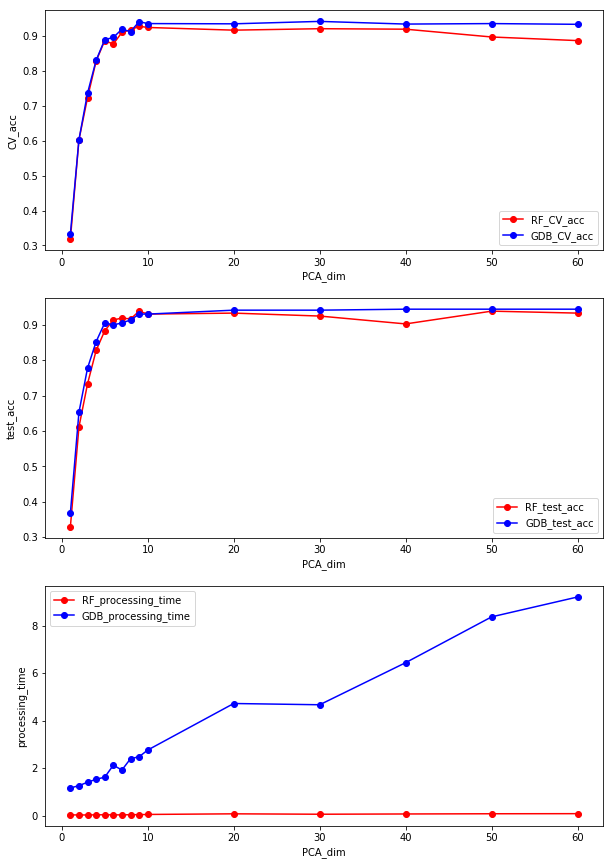

In [8]:
plt.figure(figsize=(10, 15))
conditions = [('RF_CV_acc', 'GDB_CV_acc'),
              ('RF_test_acc', 'GDB_test_acc'),
              ('RF_processing_time', 'GDB_processing_time') ]
for idx, (y1, y2) in enumerate(conditions):
    plt.subplot(3, 1, idx+1)
    x = Summary_table.PCA_dim
    y_rf = Summary_table[y1]
    y_gdb = Summary_table[y2]
    plt.plot(x, y_rf, 'r-o')
    plt.plot(x, y_gdb, 'b-o')
    plt.xlabel('PCA_dim')
    plt.ylabel(y1.split('_')[1] +'_' + y1.split('_')[2])
    plt.legend(loc='best')

plt.show()